In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data=pd.read_csv('winedata.csv')

In [3]:
data

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df1=pd.read_csv('winedata.csv',names=range(0,14),header=0)

In [5]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [89]:
df=df1

In [90]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [91]:
df.dtypes

0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [93]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [94]:
import seaborn as sns
from matplotlib import pyplot as plt

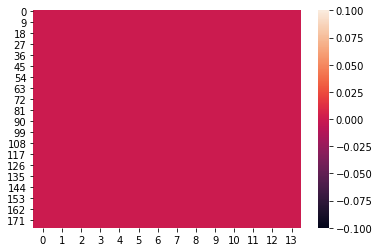

In [95]:
sns.heatmap(df.isnull())

In [96]:
cor=df.corr()

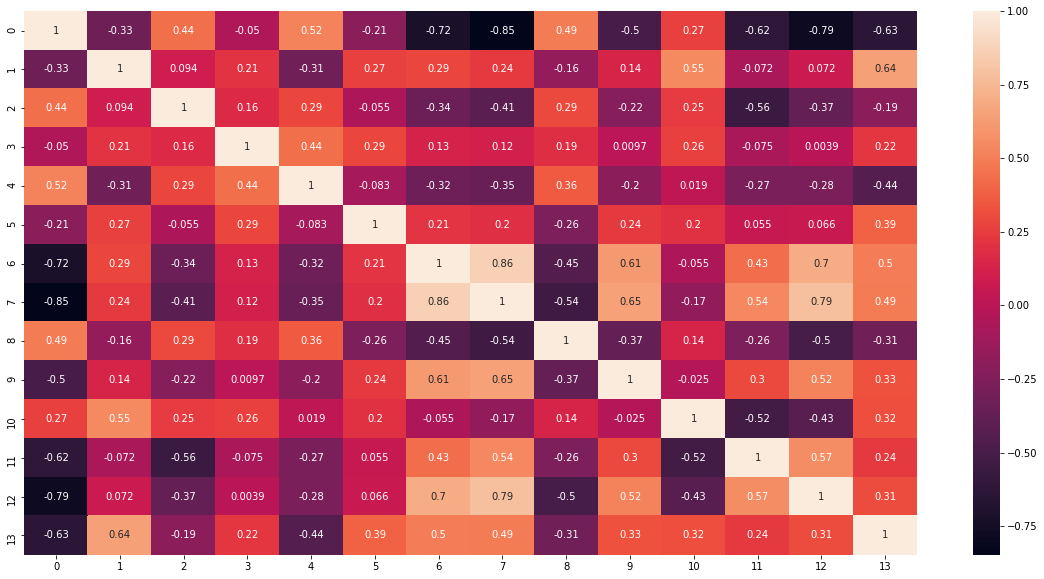

In [97]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

In [98]:
x=df.iloc[:,1:]

In [99]:
x

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [100]:
y=df.iloc[:,0].values

In [101]:
y=y.reshape(-1,1)

In [102]:
x.shape

(178, 13)

In [103]:
y.shape

(178, 1)

In [104]:
#eda process

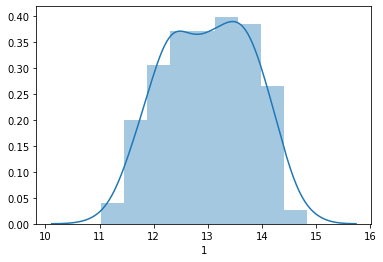

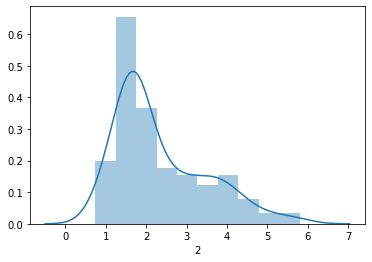

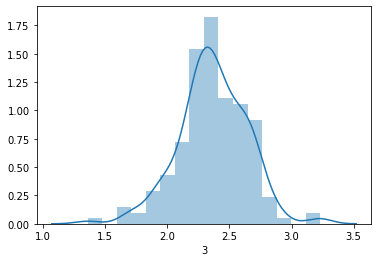

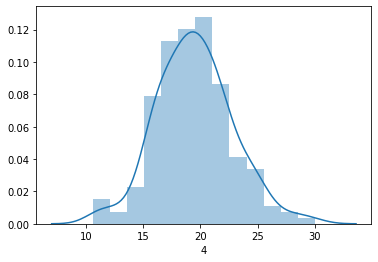

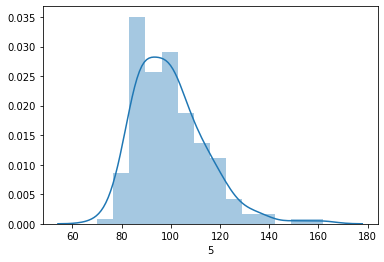

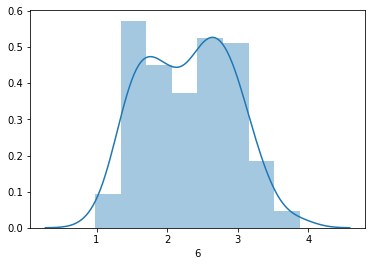

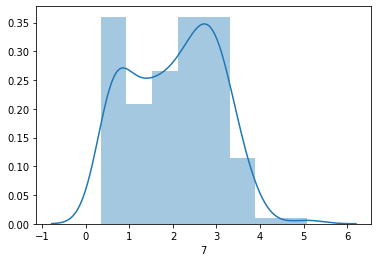

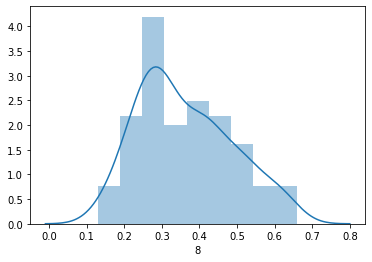

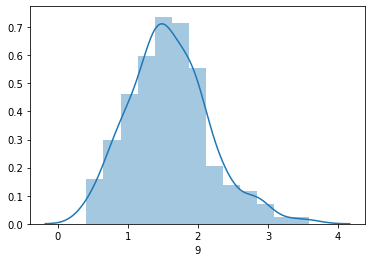

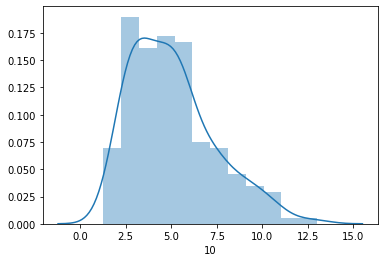

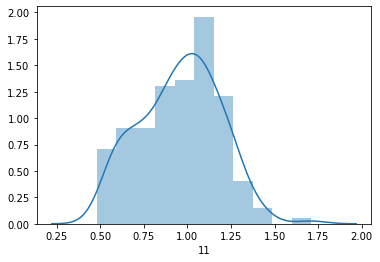

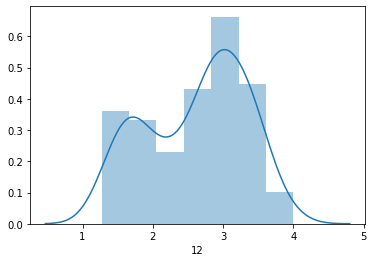

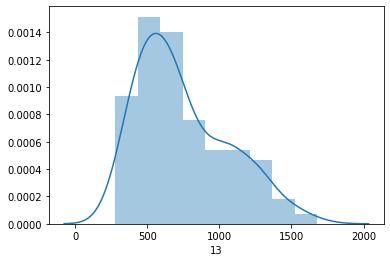

In [105]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [106]:
x.skew()

1    -0.051482
2     1.039651
3    -0.176699
4     0.213047
5     1.098191
6     0.086639
7     0.025344
8     0.450151
9     0.517137
10    0.868585
11    0.021091
12   -0.307285
13    0.767822
dtype: float64

(array([16., 42., 32., 38., 17., 13., 10.,  6.,  3.,  1.]),
 array([ 1.28 ,  2.452,  3.624,  4.796,  5.968,  7.14 ,  8.312,  9.484,
        10.656, 11.828, 13.   ]),
 <a list of 10 Patch objects>)

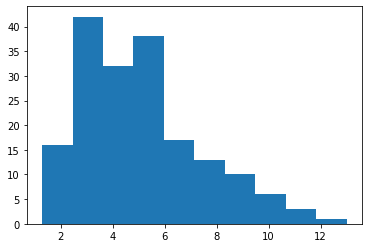

In [107]:
plt.hist(x[10])

In [108]:
x[10]=np.log(x[10])

(array([ 1.,  5., 12., 27., 26., 32., 34., 20., 16.,  5.]),
 array([0.24686008, 0.47866901, 0.71047793, 0.94228686, 1.17409579,
        1.40590472, 1.63771365, 1.86952257, 2.1013315 , 2.33314043,
        2.56494936]),
 <a list of 10 Patch objects>)

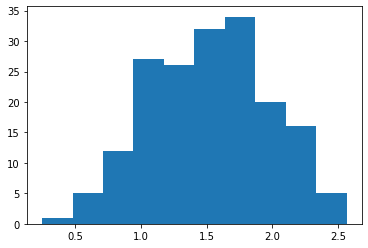

In [109]:
plt.hist(x[10])

In [110]:
x[10].skew()

-0.08046392446106772

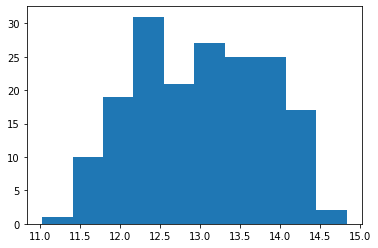

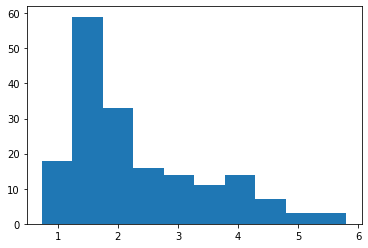

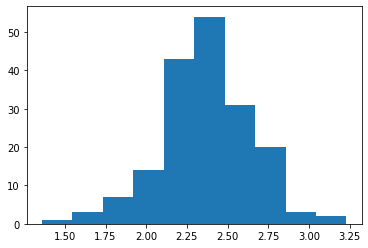

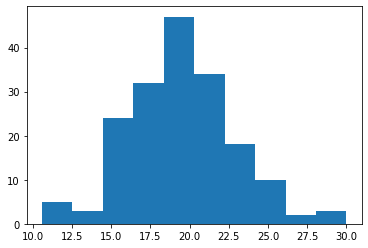

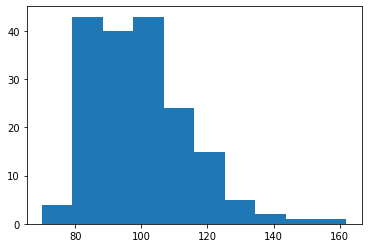

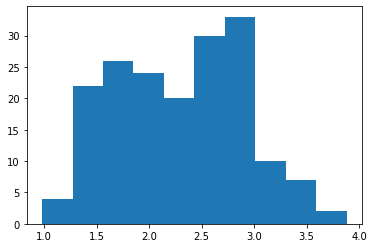

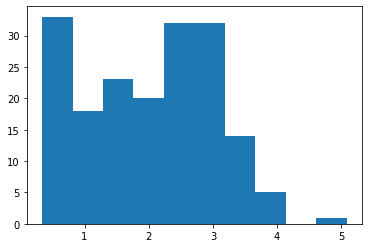

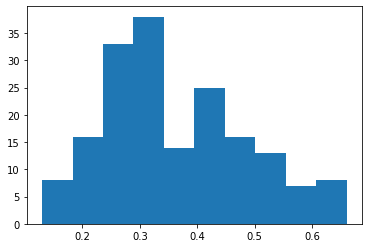

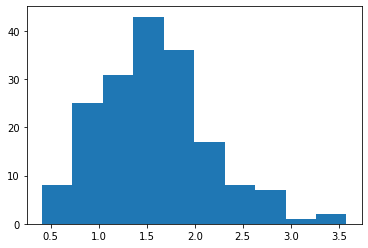

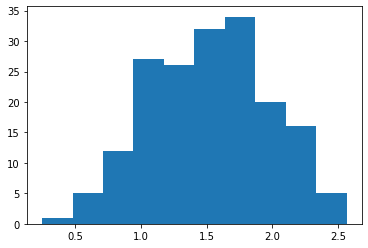

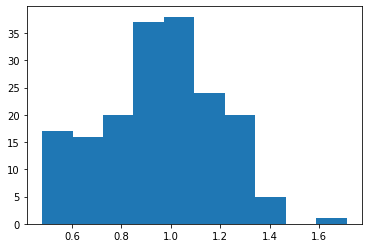

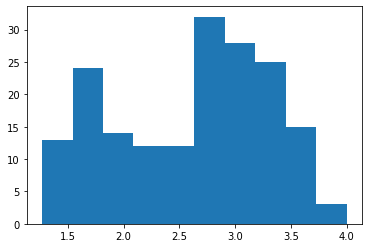

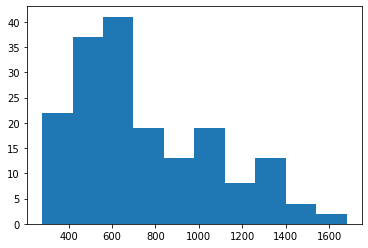

In [111]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

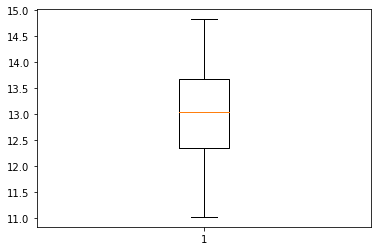

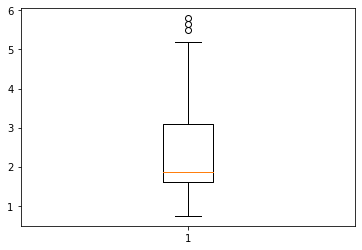

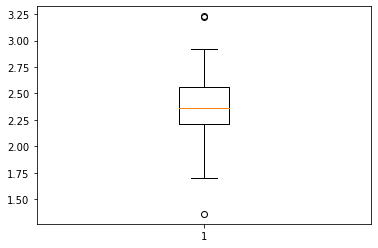

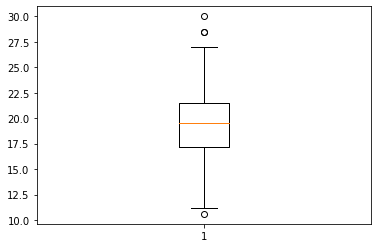

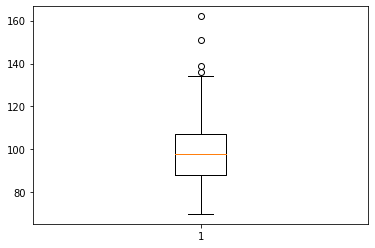

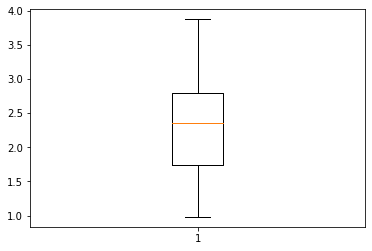

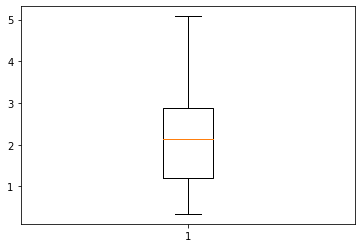

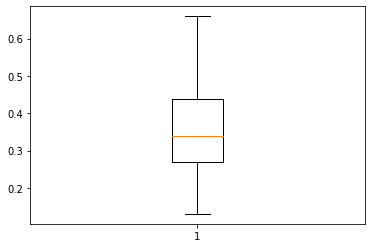

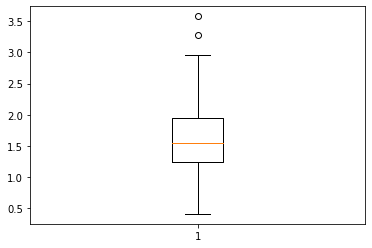

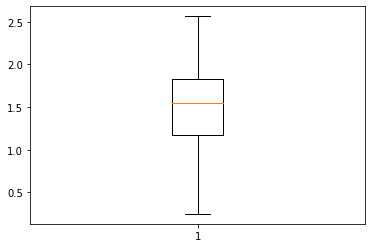

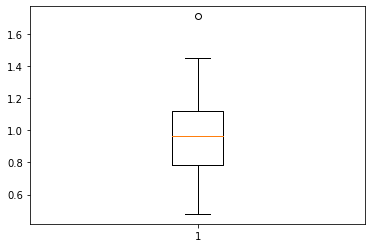

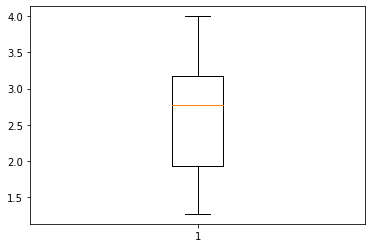

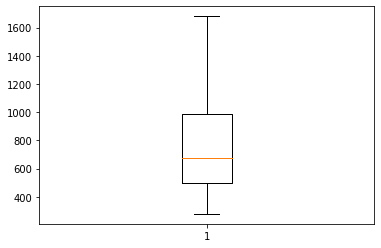

In [112]:
for i in x.columns:
    plt.figure()
    plt.boxplot(x[i])   

In [113]:
from scipy.stats import boxcox

In [114]:
x[1]=boxcox(x[1],0)

(array([ 1.,  9., 13., 28., 22., 28., 26., 29., 20.,  2.]),
 array([2.40061883, 2.43022217, 2.4598255 , 2.48942883, 2.51903216,
        2.54863549, 2.57823883, 2.60784216, 2.63744549, 2.66704882,
        2.69665216]),
 <a list of 10 Patch objects>)

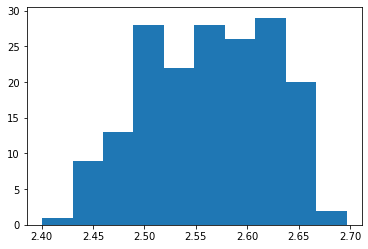

In [115]:
plt.hist(x[1])

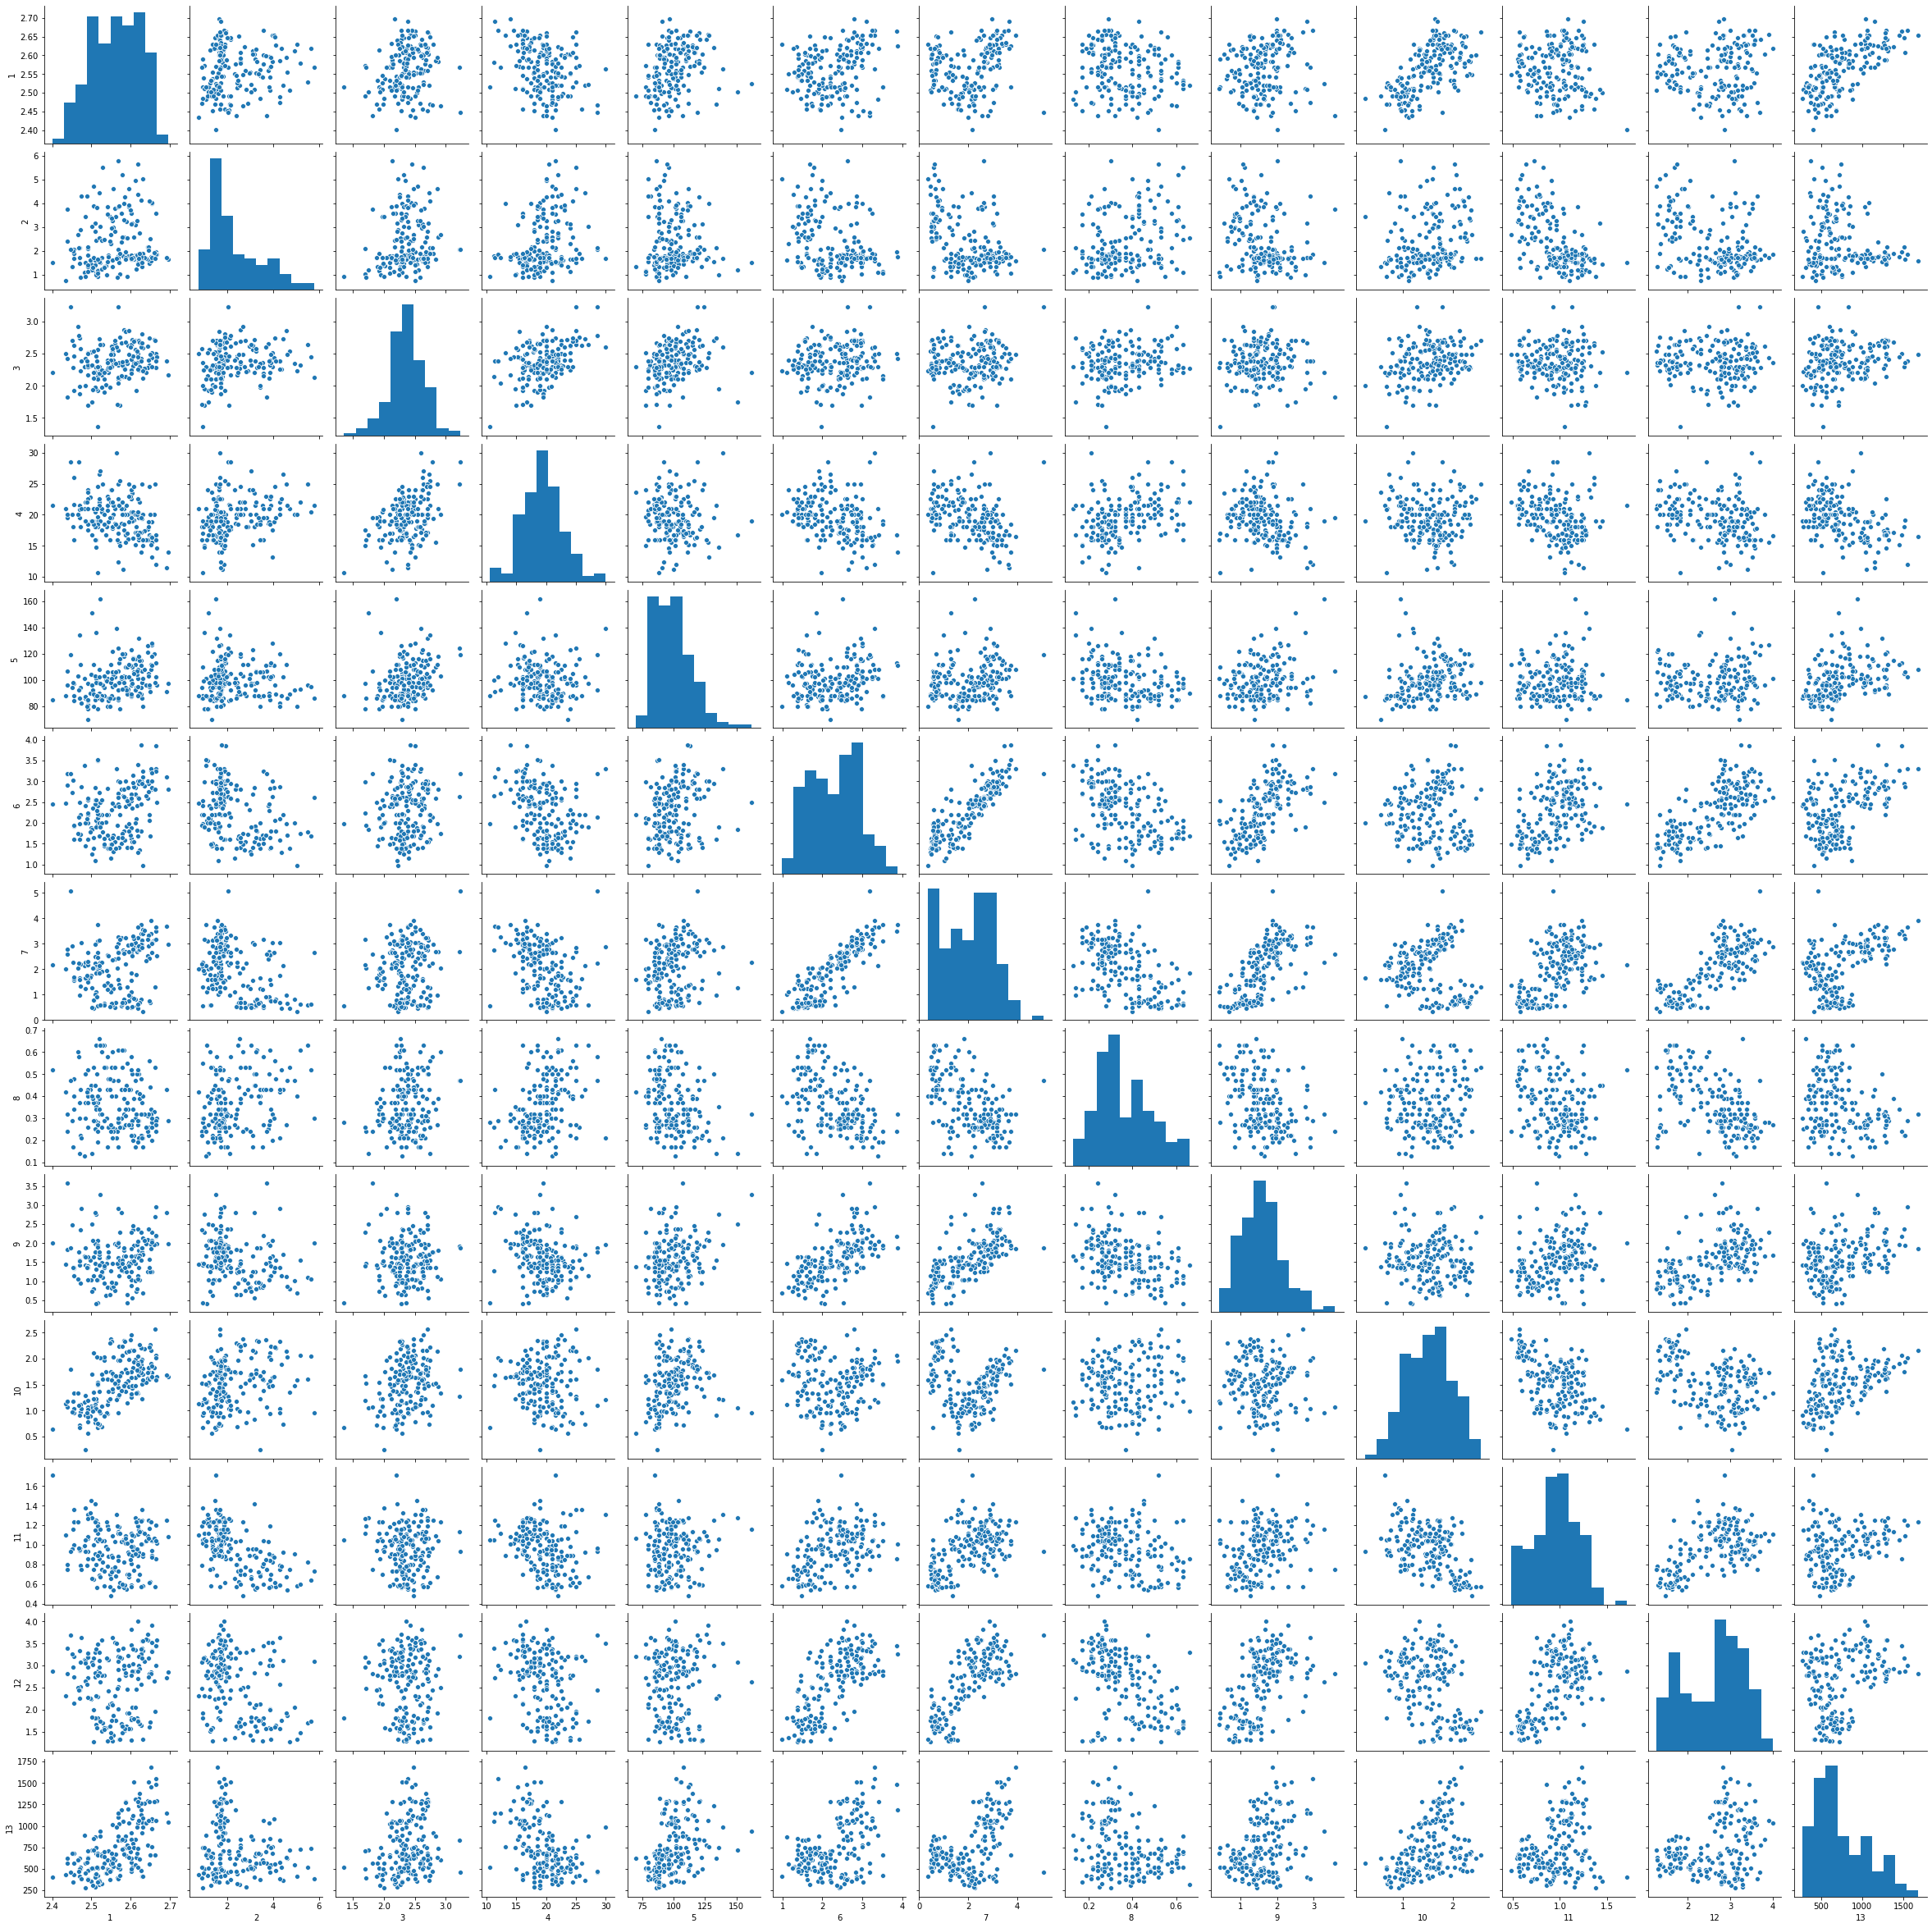

In [116]:
sns.pairplot(x)

In [117]:
#removing outliers

In [118]:
from scipy.stats import zscore

In [119]:
threshold=3
z=np.abs(zscore(x))

In [120]:
print(np.where(z>3))

(array([ 25,  59,  69,  73,  95, 110, 115, 121, 121, 123], dtype=int64), array([ 2,  2,  4,  3,  4,  8, 10,  2,  6,  1], dtype=int64))


In [121]:
z[25][2]

3.1197718608780005

In [122]:
z[59][2]

3.6791622340370105

In [123]:
x_new=x[(z<3).all(axis=1)]

In [124]:
x_new.shape

(169, 13)

In [125]:
x.shape

(178, 13)

In [126]:
from sklearn.model_selection import train_test_split
x

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2.655352,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,1.729884,1.04,3.92,1065
1,2.580217,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,1.477049,1.05,3.40,1050
2,2.577182,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,1.736951,1.03,3.17,1185
3,2.665143,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,2.054124,0.86,3.45,1480
4,2.583243,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,1.463255,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.618125,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,2.041220,0.64,1.74,740
174,2.595255,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,1.987874,0.70,1.56,750
175,2.585506,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,2.322388,0.59,1.56,835
176,2.577942,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,2.230014,0.60,1.62,840


In [190]:
#classification algorithm is not accepting negative values hence scaling techniques not used

In [186]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    mnb=MultinomialNB()
    mnb.fit(x_train,y_train)
    pred1=mnb.predict(x_test)
    acc_score=accuracy_score(pred1,y_test)
    print("r2_score corrosponding to the random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("max r2 score for the final random state:",r_state,"is:",max_acc_score)    

r2_score corrosponding to the random state: 42 is: 0.864406779661017
r2_score corrosponding to the random state: 43 is: 0.8813559322033898
r2_score corrosponding to the random state: 44 is: 0.7966101694915254
r2_score corrosponding to the random state: 45 is: 0.8135593220338984
r2_score corrosponding to the random state: 46 is: 0.8305084745762712
r2_score corrosponding to the random state: 47 is: 0.7966101694915254
r2_score corrosponding to the random state: 48 is: 0.6949152542372882
r2_score corrosponding to the random state: 49 is: 0.8813559322033898
r2_score corrosponding to the random state: 50 is: 0.8305084745762712
r2_score corrosponding to the random state: 51 is: 0.7457627118644068
r2_score corrosponding to the random state: 52 is: 0.7288135593220338
r2_score corrosponding to the random state: 53 is: 0.847457627118644
r2_score corrosponding to the random state: 54 is: 0.7457627118644068
r2_score corrosponding to the random state: 55 is: 0.8305084745762712
r2_score corrosponding

In [187]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred2=dtc.predict(x_test)
    acc_score=accuracy_score(pred2,y_test)
    print("r2_score corrosponding to the random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("max r2 score for the final random state:",r_state,"is:",max_acc_score)    

r2_score corrosponding to the random state: 42 is: 0.9661016949152542
r2_score corrosponding to the random state: 43 is: 0.9152542372881356
r2_score corrosponding to the random state: 44 is: 0.9491525423728814
r2_score corrosponding to the random state: 45 is: 0.9322033898305084
r2_score corrosponding to the random state: 46 is: 0.8813559322033898
r2_score corrosponding to the random state: 47 is: 0.9491525423728814
r2_score corrosponding to the random state: 48 is: 0.8135593220338984
r2_score corrosponding to the random state: 49 is: 0.9661016949152542
r2_score corrosponding to the random state: 50 is: 0.9491525423728814
r2_score corrosponding to the random state: 51 is: 0.8305084745762712
r2_score corrosponding to the random state: 52 is: 0.847457627118644
r2_score corrosponding to the random state: 53 is: 0.9322033898305084
r2_score corrosponding to the random state: 54 is: 0.847457627118644
r2_score corrosponding to the random state: 55 is: 0.9152542372881356
r2_score corrosponding

In [188]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred3=knn.predict(x_test)
    acc_score=accuracy_score(pred3,y_test)
    print("r2_score corrosponding to the random sate:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("max r2 score for the final random state:",r_state,"is:",max_acc_score)    

r2_score corrosponding to the random sate: 42 is: 0.6779661016949152
r2_score corrosponding to the random sate: 43 is: 0.7457627118644068
r2_score corrosponding to the random sate: 44 is: 0.6440677966101694
r2_score corrosponding to the random sate: 45 is: 0.5932203389830508
r2_score corrosponding to the random sate: 46 is: 0.6779661016949152
r2_score corrosponding to the random sate: 47 is: 0.6779661016949152
r2_score corrosponding to the random sate: 48 is: 0.6949152542372882
r2_score corrosponding to the random sate: 49 is: 0.711864406779661
r2_score corrosponding to the random sate: 50 is: 0.6271186440677966
r2_score corrosponding to the random sate: 51 is: 0.6440677966101694
r2_score corrosponding to the random sate: 52 is: 0.6949152542372882
r2_score corrosponding to the random sate: 53 is: 0.6101694915254238
r2_score corrosponding to the random sate: 54 is: 0.6440677966101694
r2_score corrosponding to the random sate: 55 is: 0.6779661016949152
r2_score corrosponding to the rando

In [189]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    svm=SVC()
    svm.fit(x_train,y_train)
    pred4=svm.predict(x_test)
    acc_score=accuracy_score(pred4,y_test)
    print("r2_score corrosponding to the random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("max r2 score for the final random state:",r_state,"is:",max_acc_score)    

r2_score corrosponding to the random state: 42 is: 0.6949152542372882
r2_score corrosponding to the random state: 43 is: 0.6440677966101694
r2_score corrosponding to the random state: 44 is: 0.6440677966101694
r2_score corrosponding to the random state: 45 is: 0.5932203389830508
r2_score corrosponding to the random state: 46 is: 0.6949152542372882
r2_score corrosponding to the random state: 47 is: 0.5932203389830508
r2_score corrosponding to the random state: 48 is: 0.6101694915254238
r2_score corrosponding to the random state: 49 is: 0.7288135593220338
r2_score corrosponding to the random state: 50 is: 0.6440677966101694
r2_score corrosponding to the random state: 51 is: 0.6610169491525424
r2_score corrosponding to the random state: 52 is: 0.6610169491525424
r2_score corrosponding to the random state: 53 is: 0.6779661016949152
r2_score corrosponding to the random state: 54 is: 0.5254237288135594
r2_score corrosponding to the random state: 55 is: 0.6610169491525424
r2_score corrospondi

In [133]:
#finalising the model
model=[MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.33)

In [135]:
for i in model:
    i.fit(x_train,y_train)
    print(i.score(x_train,y_train))    
    p=i.predict(x_test)
    print("accuracy score of:",i,"is",accuracy_score(p,y_test))
    print("classification report of",i,"is:",classification_report(p,y_test))
    print("confusion matrix of",i,"is",confusion_matrix(p,y_test))

0.8319327731092437
accuracy score of: MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is 0.7966101694915254
classification report of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is:               precision    recall  f1-score   support

           1       0.83      0.83      0.83        18
           2       0.79      0.79      0.79        24
           3       0.76      0.76      0.76        17

    accuracy                           0.80        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.80      0.80      0.80        59

confusion matrix of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is [[15  2  1]
 [ 2 19  3]
 [ 1  3 13]]
1.0
accuracy score of: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1

In [148]:
# Cross val score

In [141]:
from sklearn.model_selection import cross_val_score 

In [142]:
score=cross_val_score(mnb,x,y,cv=5)

In [143]:
score

array([0.75      , 0.75      , 0.75      , 0.88571429, 0.97142857])

In [144]:
score1=cross_val_score(dtc,x,y,cv=5)
score1

array([0.94444444, 0.86111111, 0.94444444, 0.91428571, 0.82857143])

In [146]:
score2=cross_val_score(knn,x,y,cv=5)
score2

array([0.72222222, 0.66666667, 0.63888889, 0.68571429, 0.74285714])

In [147]:
score3=cross_val_score(svm,x,y,cv=5)
score3

array([0.63888889, 0.61111111, 0.63888889, 0.68571429, 0.74285714])

In [151]:
#using hyperparameter for svm

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
attr={'kernel':('linear','rbf','poly'),"C":[10,1]}
grid=GridSearchCV(estimator=svm,param_grid=attr)

In [154]:
grid.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 1], 'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [155]:
print(grid.best_estimator_)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [156]:
print(grid.best_params_)

{'C': 10, 'kernel': 'linear'}


In [157]:
print(grid.best_score_)

0.9553968253968254


In [158]:
#using dtc

In [163]:
attr={'criterion':('gini','entropy')}
grid1=GridSearchCV(estimator=dtc,param_grid=attr,scoring='accuracy',cv=5)

In [164]:
grid1.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy')},
             pre_d

In [168]:
print(grid1.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [169]:
print(grid1.best_params_)

{'criterion': 'entropy'}


In [170]:
print(grid1.best_score_)

0.8880952380952379


In [165]:
#for knn

In [166]:
attr={'n_neighbors':[5,6,7,8,9]}
grid2=GridSearchCV(estimator=knn,param_grid=attr)

In [167]:
grid2.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [171]:
print(grid2.best_estimator_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


In [172]:
print(grid2.best_params_)

{'n_neighbors': 9}


In [173]:
print(grid2.best_score_)

0.696984126984127


In [174]:
#boosting the result using ensembling techniques

In [184]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [176]:
ad=AdaBoostClassifier()

In [177]:
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [178]:
predad=ad.predict(x_test)

In [179]:
accuracy_score(y_test,predad)

0.8983050847457628

In [181]:
gd=GradientBoostingClassifier()

In [182]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [183]:
predgd=gd.predict(x_test)

In [185]:
accuracy_score(predgd,y_test)

0.9491525423728814

In [191]:
#dumping the final model

In [192]:
import pickle

In [193]:
filename='wine_data_final'

In [194]:
pickle.dump(mnb,open(filename,'wb'))

In [195]:
pickle.dump(dtc,open(filename,'wb'))

In [196]:
pickle.dump(knn,open(filename,'wb'))

In [197]:
pickle.dump(svm,open(filename,'wb'))

In [198]:
#######end#########